In [24]:
import Encoder
import Decoder
from MQRNN import MQRNN 
from data import MQRNN_dataset,read_df
import pandas as pd
import numpy as np
from data import MQRNN_dataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
from train import train

In [35]:
config = {
    'horizon_size':30,
    'hidden_size':32,
    'quantiles': [0.1,0.3,0.5,0.7,0.9], 
    'columns': [1],
    'dropout': 1e-3,
    'layer_size':5,
    'b_direction':False,
    'lr': 1e-3,
    'batch_size': 1,
    'num_epochs':100,
    'context_size': 16,
}
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_target_df, test_target_df, train_covariate_df, test_covariate_df, mean_std = read_df(config)
config['covariate_size'] = train_covariate_df.shape[1]
config['device'] = device
train_target_df = train_target_df.to_numpy().reshape((-1,1))
test_target_df = test_target_df.to_numpy().reshape((-1,1))
train_covariate_df = train_covariate_df.to_numpy()
test_covariate_df = test_covariate_df.to_numpy()
test_target_df = test_target_df*mean_std[1] + mean_std[0]


In [80]:
config['hidden_size'] = 60
config['dropout'] = 0
config['layer_size'] = 3
config['lr'] = 1e-2
config['context_size'] = 30
config['num_epochs'] = 500
horizon_size = config['horizon_size']
hidden_size = config['hidden_size']
quantiles = config['quantiles']
quantiles_size = len(quantiles)
columns = config['columns']
dropout = config['dropout']
layer_size = config['layer_size']
b_direction = config['b_direction']
lr = config['lr']
batch_size= config['batch_size']
num_epochs = config['num_epochs']
context_size = config['context_size']
covariate_size = config['covariate_size']
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_dataset = MQRNN_dataset(train_target_df,train_covariate_df,horizon_size)
data_iter = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True,num_workers=0)
net = MQRNN(horizon_size,hidden_size,quantiles,dropout,layer_size,b_direction,lr,batch_size,num_epochs,context_size,covariate_size,device)

self.covariate_df.shape[0] : 93
full_covariate shape: (63, 1, 30, 2)


In [81]:
myseed = 114514  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)
train(net,train_dataset,lr,batch_size,num_epochs,quantiles,device)

epoch_num 5, current loss is: 1799.1798941798943
epoch_num 10, current loss is: 1664.5683862433862
epoch_num 15, current loss is: 1545.5900793650794
epoch_num 20, current loss is: 1479.226851851852
epoch_num 25, current loss is: 1479.449470899471
epoch_num 30, current loss is: 1483.2030423280423
epoch_num 35, current loss is: 1482.6820105820107
epoch_num 40, current loss is: 1479.371560846561
epoch_num 45, current loss is: 1475.358201058201
epoch_num 50, current loss is: 1473.638888888889
epoch_num 55, current loss is: 1473.8895502645503
epoch_num 60, current loss is: 1473.7301587301588
epoch_num 65, current loss is: 1473.4853174603174
epoch_num 70, current loss is: 1473.5367724867724
epoch_num 75, current loss is: 1473.5060846560846
epoch_num 80, current loss is: 1473.4501322751323
epoch_num 85, current loss is: 1473.360052910053
epoch_num 90, current loss is: 1473.3362433862435
epoch_num 95, current loss is: 1473.273544973545
epoch_num 100, current loss is: 1474.8787037037036
epoch_n

In [82]:
predict_dict = net.predict(train_target_df, train_covariate_df, test_covariate_df)
predict_dict = np.array(list(predict_dict.values()))
#逆归一化
mean = mean_std[0]
std = mean_std[1]
predict_dict = predict_dict*std + mean

prediction finished


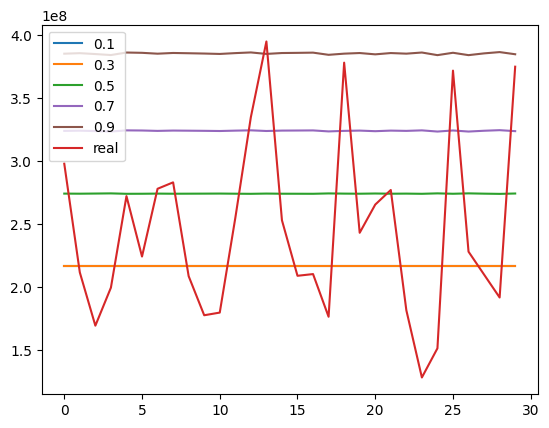

In [83]:
plt.plot(predict_dict[0,:], color = '#1f77b4', label='0.1')
plt.plot(predict_dict[1,:], color = '#ff7f0e', label='0.3')
plt.plot(predict_dict[2,:], color = '#2ca02c', label='0.5')
plt.plot(predict_dict[3,:], color = '#9467bd', label='0.7')
plt.plot(predict_dict[4,:], color = '#8c564b', label='0.9')
plt.plot(test_target_df, color= '#d62728', label='real')
plt.legend()
